# **Kaggle 데이터를 이용한 Human Emotion Classification**

In [ ]:
import tensorflow as tf

tf.__version__


'2.9.2'

## **깃허브 연동**

# **여기부터 시작**

In [11]:
import pandas as pd     # pandas DataFrame 이용
import numpy as np      
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping

path = "/content/drive/MyDrive/Emotion_dataset/"

# train_data = pd.read_csv(path + "train.csv")
# test_data = pd.read_csv(path + "test.csv")
prior_data = pd.read_csv(path + 'icml_face_data.csv')     # Google Drive에 있는 dataset 로드. 전처리 전의 초기 데이터. Pandas DataFrame

print(prior_data.head())    # 첫번째 데이터 임의 출력

# 0 = Angry, 1 = Disgust, 2 = Fear, 3 = Happy, 4 = Sad, 5 = Surprise, 6 = Neutral

print("\n prior_Data의 colum 종류와 개수")
print(prior_data['emotion'].value_counts())

# pixel column은 앞에 한 칸 띄워져있음. 이점 유의.... 삽질ㅅㅄㅄㅄㅄㅄㅄㅂ;;;; ' pixels' 로 써야됨

disgust_idx = prior_data[prior_data['emotion'] == 1].index
dataset = prior_data.drop(disgust_idx)      # disgust 데이터가 부족해서 제거한 후의 데이터셋

print("\n dataset의 column 종류와 개수")
print(dataset['emotion'].value_counts())

# 0 = Angry, 2 = Fear, 3 = Happy, 4 = Sad, 5 = Surprise, 6 = Neutral

print("\n첫번째 데이터")
print(dataset[' pixels'][0])

print("\n첫번째 데이터 길이")
print(len(dataset[' pixels'][0]))    # 48X48은 2304인데, 데이터 길이가 8287이 나옴. object로 되어있어서 데이터 타입을 numpy로 바꿔줘야함.

temp = np.fromstring(dataset[' pixels'][0], dtype=int, sep=' ')    # 공백 기준으로 데이터를 int로 바꾸어 전체 데이터는 numpy(행렬)가 됨.
print(len(temp))

print(len(dataset[' pixels'][0]))    # 48X48은 2304인데, 데이터 길이가 8287이 나옴. object로 되어있어서 데이터 타입을 numpy로 바꿔줘야함.
print()

   emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...

 prior_Data의 colum 종류와 개수
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

 dataset의 column 종류와 개수
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
Name: emotion, dtype: int64

첫번째 데이터
70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 

## **데이터 전처리 함수**

In [ ]:
def Preprocessing(data):
  image_size = 224
  image = np.zeros(shape=(len(data), image_size, image_size))   # 48x48을 0으로 일단 채움
  label = np.array(list(map(int, data['emotion'])))   # 0~6까지 값. 어떤 감정인지. 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

  for i, row in enumerate(data.index):
    df = np.fromstring(data[' pixels'][row], dtype=int, sep=' ')    # numpy로 바꿈
    df = np.reshape(df, (image_size, image_size))     ## 48x48로 크기 바꿈
    image[i] = df     # 바꾼 크기 image 배열에 삽입
  return image, label

## **모델에 넣기 위한 데이터 전처리**

In [ ]:
# 데이터 구분 
x_train, y_train = Preprocessing(data[data[' Usage'] == 'Training'])
x_val, y_val = Preprocessing(data[data[' Usage'] == 'PrivateTest'])
x_test, y_test = Preprocessing(data[data[' Usage'] == 'PublicTest'])

# 확인
print(x_train.shape, x_val.shape, x_test.shape)

## **이미지 확인**

label:  0


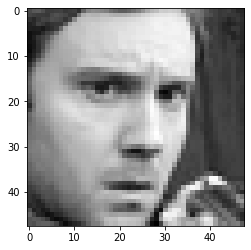

In [ ]:
# 첫번째 이미지 확인 
plt.imshow(x_train[0], cmap='gray')
print("label: ", y_train[0])

## **베이스라인 모델**

In [ ]:
# 모델1
model = Sequential([
    Flatten(input_shape=(48, 48)),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# 학습
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64)

Epoch 1/5
449/449 [==============================] - 4s 3ms/step - loss: 32.3576 - accuracy: 0.2067 - val_loss: 1.9299 - val_accuracy: 0.2449
Epoch 2/5
449/449 [==============================] - 1s 3ms/step - loss: 1.8895 - accuracy: 0.2512 - val_loss: 1.8614 - val_accuracy: 0.2444
Epoch 3/5
449/449 [==============================] - 1s 3ms/step - loss: 1.8467 - accuracy: 0.2514 - val_loss: 1.8361 - val_accuracy: 0.2449
Epoch 4/5
449/449 [==============================] - 1s 3ms/step - loss: 1.8272 - accuracy: 0.2515 - val_loss: 1.8268 - val_accuracy: 0.2449
Epoch 5/5
449/449 [==============================] - 1s 3ms/step - loss: 1.8186 - accuracy: 0.2516 - val_loss: 1.8216 - val_accuracy: 0.2449


In [ ]:
# 모델2
model = Sequential([
    Flatten(input_shape=(48,48)),
    BatchNormalization(),
    Dense(128, activation='relu'), 
    BatchNormalization(),
    Dense(7, activation='softmax')

])

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

# 학습
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=32)

Epoch 1/5
898/898 [==============================] - 4s 4ms/step - loss: 1.7079 - accuracy: 0.3402 - val_loss: 1.6045 - val_accuracy: 0.3731
Epoch 2/5
898/898 [==============================] - 3s 4ms/step - loss: 1.5880 - accuracy: 0.3806 - val_loss: 1.6005 - val_accuracy: 0.3728
Epoch 3/5
898/898 [==============================] - 3s 4ms/step - loss: 1.5444 - accuracy: 0.3992 - val_loss: 1.5639 - val_accuracy: 0.3887
Epoch 4/5
898/898 [==============================] - 3s 4ms/step - loss: 1.5077 - accuracy: 0.4149 - val_loss: 1.5436 - val_accuracy: 0.4087
Epoch 5/5
898/898 [==============================] - 3s 4ms/step - loss: 1.4737 - accuracy: 0.4303 - val_loss: 1.5253 - val_accuracy: 0.4135


## **CNN**

In [ ]:
# CNN 모델
img_height = 48;
img_width = 48;
ch = 1;

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, ch)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3) 

# 학습
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=32)

Epoch 1/5


ValueError: ignored